# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ja'far Shodiq
- Email: jafarshodiq.alkaf@gmail.com
- Id Dicoding: jafar_shodiq

## Persiapan

### Menyiapkan library yang dibutuhkan

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import joblib
from sqlalchemy import create_engine
import pickle
import sqlite3

### Menyiapkan data yang akan diguankan

## Data Understanding

### Load Data

In [2]:
url_df = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'
df = pd.read_csv(url_df, delimiter=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


 Feature Descriptions - Student Dataset

 Marital Status

Description: Marital status of the student
Type: Categorical
Values:

* `1`: Single
* `2`: Married
* `3`: Widower
* `4`: Divorced
* `5`: De facto union
* `6`: Legally separated

---

 Application Mode

Description: Method of application
Type: Categorical
Sample Values:

* `1`: 1st phase - general contingent
* `2`: Ordinance No. 612/93
* `5`: 1st phase - special contingent (Azores Island)
* `7`: Holders of other higher courses
  *(more values available)*

---

 Application Order

Description: Student's application order (0 = first choice)
Type: Numerical
Range: `0` to `9`

---

 Course

Description: Enrolled course
Type: Categorical
Examples:

* `33`: Biofuel Production Technologies
* `171`: Animation and Multimedia Design
* `8014`: Social Service (evening attendance)
* `9991`: Management (evening attendance)
  *(more values available)*

---

 Daytime/Evening Attendance

Description: Type of attendance
Type: Categorical

* `1`: Daytime
* `0`: Evening

---

 Previous Qualification

Description: Prior qualification before current enrollment
Type: Categorical
Sample Values:

* `1`: Secondary education
* `2`: Bachelor's degree
* `5`: Doctorate
* `19`: Basic education 3rd cycle
  *(more values available)*

---

 Previous Qualification Grade

Description: Grade from previous qualification
Type: Numerical
Range: `0` to `200`

---

 Nationality

Description: Student's nationality
Type: Categorical
Examples:

* `1`: Portuguese
* `6`: German
* `14`: Spanish
* `62`: Angolan
  *(more values available)*

---

 Mother's Qualification

Description: Mother's educational background
Type: Categorical
Sample Values:

* `1`: Secondary education
* `2`: Bachelor's degree
* `5`: Doctorate
  *(more values available)*

---

 Father's Qualification

Description: Father's educational background
Type: Categorical
Sample Values:

* Same as Mother's Qualification

---

 Mother's Occupation

Description: Mother's job type
Type: Categorical
Examples:

* `1`: Executives
* `2`: Professionals
* `3`: Technicians and associate professionals
  *(more values available)*

---

 Father's Occupation

Description: Father's job type
Type: Categorical
Examples:

* Same as Mother's Occupation

---

 Admission Grade

Description: Grade for admission
Type: Numerical
Range: `0` to `200`

---

 Displaced

Description: Whether student is displaced from family location
Type: Binary

* `1`: Yes
* `0`: No

---

 Educational Subsidy

Description: Whether student receives education subsidy
Type: Binary

* `1`: Yes
* `0`: No

---

 Social Benefits

Description: Whether student receives other social benefits
Type: Binary

* `1`: Yes
* `0`: No

---

 Tuition Fees Up to Date

Description: Whether student's tuition fees are current
Type: Binary

* `1`: Yes
* `0`: No

---

 Gender

Description: Gender of the student
Type: Categorical

* `1`: Male
* `0`: Female

---

 Scholarship Holder

Description: Whether student holds a scholarship
Type: Binary

* `1`: Yes
* `0`: No

---

 International

Description: Whether student is an international student
Type: Binary

* `1`: Yes
* `0`: No

---

 Debtor

Description: Whether student has unpaid debts
Type: Binary

* `1`: Yes
* `0`: No

---

 Tuition Fees Debt

Description: Whether student has unpaid tuition fees
Type: Binary

* `1`: Yes
* `0`: No

---

 Unemployment Rate

Description: Regional unemployment rate when student enrolled
Type: Numerical
Unit: Percent (%)

---

 Inflation Rate

Description: Regional inflation rate at enrollment time
Type: Numerical
Unit: Percent (%)

---

 GDP

Description: GDP per capita of region at enrollment time
Type: Numerical
Unit: Currency

### Exploratory Data Analysis

In [3]:
# cek info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

- mayoritas fitur dalam dataset bertipe numerik biner (0 dan 1)

In [6]:
# cek distribusi data
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
# cek missing value
print("Missing values in each column:")
print(df.isna().sum())

Missing values in each column:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment  

- tidak ditemukan missing value

In [8]:
# cek duplicate
print("Duplicate rows in the DataFrame:", df.duplicated().sum())

Duplicate rows in the DataFrame: 0


- tidak di temukan duplikasi data pada dataframe

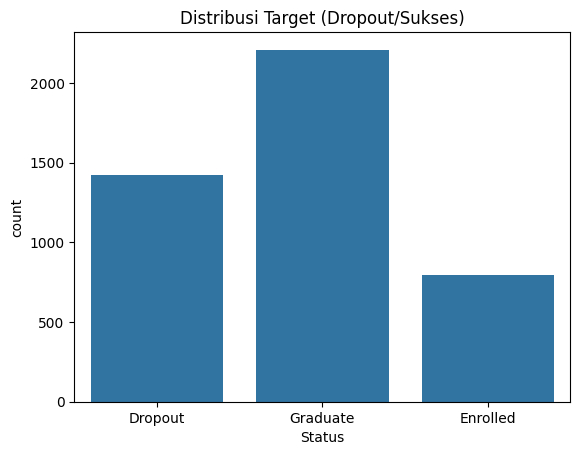

In [9]:
# visualisasi distribusi kolom target (status)
sns.countplot(x='Status', data=df)
plt.title('Distribusi Target (Dropout/Sukses)')
plt.show()

- jumlah kelas target yang tidak seimbang

## Data Preparation / Preprocessing

In [10]:
df_preprocessed = df.copy()

### Feature Scaling

In [11]:
# Scale numerical features
numerical_features = ['Previous_qualification_grade', 'Admission_grade',
                    'Unemployment_rate', 'Inflation_rate', 'GDP']

scaler = StandardScaler()
df_preprocessed[numerical_features] = scaler.fit_transform(df_preprocessed[numerical_features])

### Feature Engineering


In [12]:
# Create new features
df_preprocessed['Parents_education_diff'] = abs(df_preprocessed['Mothers_qualification'] - df_preprocessed['Fathers_qualification'])
df_preprocessed['Financial_burden'] = df_preprocessed['Debtor'] + df_preprocessed['Tuition_fees_up_to_date']

# Create academic background score
df_preprocessed['Academic_background'] = (df_preprocessed['Previous_qualification_grade'] + 
                                        df_preprocessed['Admission_grade']) / 2

### Train-Test Split

In [13]:
# Prepare features and target
X = df_preprocessed.drop('Status', axis=1)
y = df_preprocessed['Status']

# Split data with stratification to handle potential class imbalance
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                random_state=42, stratify=y)

## Modeling

In [14]:
model = RandomForestClassifier(random_state=42)

# Latih model
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [15]:
# Prediksi pada data uji
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

# Evaluasi hasil
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr', average='macro'))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[217  20  47]
 [ 38  60  61]
 [ 12  18 412]]

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.81      0.76      0.79       284
    Enrolled       0.61      0.38      0.47       159
    Graduate       0.79      0.93      0.86       442

    accuracy                           0.78       885
   macro avg       0.74      0.69      0.70       885
weighted avg       0.77      0.78      0.76       885


AUC-ROC Score: 0.8866985095603567

Accuracy Score: 0.7785310734463277


In [16]:
# Menyimpan model yang dilatih
joblib.dump(model, 'student_dropout_model.pkl')

['student_dropout_model.pkl']

menyimpan model yang telah di latih

In [17]:
# simpan features yang digunakan
with open('features_used.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

Informasi fitur telah disimpan ke 'features_used.pkl'

## import dataframe

In [25]:
try:
    # Buat koneksi ke SQLite database (file akan dibuat otomatis jika belum ada)
    sqlite_engine = create_engine('sqlite:///student_performance.db')
    
    # Simpan DataFrame ke SQLite
    df.to_sql('student_performance', sqlite_engine, index=False, if_exists='replace')
    print("✅ Data berhasil disimpan ke SQLite database!")
    
except Exception as e:
    print(f"❌ Error: {e}")

✅ Data berhasil disimpan ke SQLite database!
